In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("ulasan_aplikasi.csv")

In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,6e12324d-a24e-4e2f-aac3-e65f19cf7d53,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Worst e-money app I ever used, making every on...",1,75,NaN,2024-06-22 01:15:55,"Hi Axell, don't worry okay. DANA makes it easi...",2024-06-22 05:54:43,NaN
1,cbc2d6aa-8cf2-402b-966b-4aa015567e2c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The worst e-wallet experience I have ever had....,1,203,NaN,2024-03-09 02:13:46,"Hi there, sorry for making you uneasy. So that...",2024-03-09 04:05:53,NaN
2,9fa385b7-4557-4f24-9bd4-c0ba76cf204e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,TERRIBLE! I've spent 30 minute to do a simple ...,1,889,1.36.0,2021-07-08 16:22:15,"Hi There, kindly send the detail of your issue...",2021-07-09 03:33:27,1.36.0
3,fe58b850-3ac3-430c-b279-4a77aace8bf5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"It used to be a great app, but recently I can'...",1,1142,1.33.1,2021-05-24 10:22:11,"Hi There, kindly send the detail of your issue...",2021-05-26 07:05:20,1.33.1
4,d9dff1d0-f6ac-4604-b1fb-8901543e7982,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The most terrible experience I've ever got sin...,1,490,2.20.0,2022-08-26 04:39:35,"Hi kak, aku ngerti banget sma permasalahan kam...",2022-08-29 12:03:46,2.20.0


In [ ]:
new_df = df.drop(['reviewId','userName', 'userImage', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion', 'score', 'thumbsUpCount'], axis=1)

In [ ]:
new_df.head()

,content
0,"Worst e-money app I ever used, making every on..."
1,The worst e-wallet experience I have ever had....
2,TERRIBLE! I've spent 30 minute to do a simple ...
3,"It used to be a great app, but recently I can'..."
4,The most terrible experience I've ever got sin...


In [ ]:
new_df = new_df.drop_duplicates().dropna()

In [ ]:
new_df.head()

,content
0,"Worst e-money app I ever used, making every on..."
1,The worst e-wallet experience I have ever had....
2,TERRIBLE! I've spent 30 minute to do a simple ...
3,"It used to be a great app, but recently I can'..."
4,The most terrible experience I've ever got sin...


In [ ]:
new_df.shape

(18287, 1)

In [ ]:
new_df.isnull().any().any()

False

In [ ]:
new_df.duplicated().any()

False

In [ ]:
%pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=0284c06cf5ce023456572cd4ead7b875f97830905c30f854c6e8c0724c1dd067
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from langdetect import detect

In [ ]:
def check_words_if_not_english(text):
  try:
      return detect(text) == 'en'
  except:
      return False

In [ ]:
new_df['is_english'] = new_df['content'].apply(check_words_if_not_english)

In [ ]:
new_df.head()

,content,is_english
0,"Worst e-money app I ever used, making every on...",True
1,The worst e-wallet experience I have ever had....,True
2,TERRIBLE! I've spent 30 minute to do a simple ...,True
3,"It used to be a great app, but recently I can'...",True
4,The most terrible experience I've ever got sin...,True


In [ ]:
new_df.to_csv('check_english.csv', index=False)

In [ ]:
import pandas as pd

In [ ]:
df_filtered_english = pd.read_csv('check_english.csv')

In [ ]:
df_filtered_english = df_filtered_english.drop('is_english', axis=1)

In [ ]:
df_filtered_english.head()

,content
0,"Worst e-money app I ever used, making every on..."
1,The worst e-wallet experience I have ever had....
2,TERRIBLE! I've spent 30 minute to do a simple ...
3,"It used to be a great app, but recently I can'..."
4,The most terrible experience I've ever got sin...


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def cleaning_dataset(text):
    doc = nlp(text)
    res = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
    return ' '.join(res)

In [ ]:
df_filtered_cleaning = df_filtered_english

In [ ]:
df_filtered_cleaning.head()

,content
0,"Worst e-money app I ever used, making every on..."
1,The worst e-wallet experience I have ever had....
2,TERRIBLE! I've spent 30 minute to do a simple ...
3,"It used to be a great app, but recently I can'..."
4,The most terrible experience I've ever got sin...


In [ ]:
df_filtered_cleaning['content'] = df_filtered_cleaning['content'].apply(cleaning_dataset)

In [ ]:
df_filtered_cleaning.head()

,content
0,bad e money app make online payment complicate...
1,bad e wallet experience unresponsive ui slow t...
2,terrible spend minute simple payment friend en...
3,great app recently use send feature stuck proc...
4,terrible experience get e wallet responsive bu...


In [ ]:
df_filtered_cleaning.to_csv('cleaning.csv', index=False)

In [ ]:
df_filtered_cleaning.head()

,content
0,bad e money app make online payment complicate...
1,bad e wallet experience unresponsive ui slow t...
2,terrible spend minute simple payment friend en...
3,great app recently use send feature stuck proc...
4,terrible experience get e wallet responsive bu...


In [ ]:
import numpy as np

In [ ]:
df_split = np.array_split(df_filtered_cleaning, 4)

for i, part in enumerate(df_split):
    filename = f'df_part_{i+1}.csv'
    part.to_csv(filename, index=False)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
from transformers import pipeline

In [ ]:
classifier = pipeline("text-classification", model="j-hartmann/sentiment-roberta-large-english-3-classes", return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Some weights of the model checkpoint at j-hartmann/sentiment-roberta-large-english-3-classes were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
df_labeled_first_part = pd.read_csv('df_part_1.csv')
df_labeled_first_part.head()

,content
0,bad e money app make online payment complicate...
1,bad e wallet experience unresponsive ui slow t...
2,terrible spend minute simple payment friend en...
3,great app recently use send feature stuck proc...
4,terrible experience get e wallet responsive bu...


In [ ]:
df_labeled_second_part = pd.read_csv('df_part_2.csv')
df_labeled_second_part.head()

,content
0,dana awesome useful spend money
1,good app stable easy pay new wallet
2,easy use offer promo
3,far have good experience dana cash significantly
4,discount love easy use


In [ ]:
df_labeled_third_part = pd.read_csv('df_part_3.csv')
df_labeled_third_part.head()

,content
0,dana credit lose cancel transaction
1,enjoy dana marketplace transaction banking tra...
2,verify account login account
3,great discount promo
4,nice easy use


In [ ]:
df_labeled_fourth_part = pd.read_csv('df_part_4.csv')
df_labeled_fourth_part.head()

,content
0,easy transfer money
1,love love love deh pokoknya
2,berry nice app
3,live easy
4,fully cash


In [ ]:
def labeling_dataset(text):
    label = classifier(text)
    return max(label[0], key=lambda x: x['score'])['label']

In [ ]:
df_labeled_first_part_string = df_labeled_first_part.astype(str)

In [ ]:
df_labeled_first_part_string['label'] = df_labeled_first_part_string['content'].apply(labeling_dataset)

In [ ]:
df_labeled_first_part_string.to_csv("labeled_part_1.csv", index=False)

In [ ]:
df_labeled_second_part_string = df_labeled_second_part.astype(str)

In [ ]:
df_labeled_second_part_string['label'] = df_labeled_second_part_string['content'].apply(labeling_dataset)

In [ ]:
df_labeled_second_part_string.to_csv("labeled_part_2.csv", index=False)

In [ ]:
df_labeled_third_part_string = df_labeled_third_part.astype(str)

In [ ]:
df_labeled_third_part_string['label'] = df_labeled_third_part_string['content'].apply(labeling_dataset)

In [ ]:
df_labeled_third_part_string.to_csv("labeled_part_3.csv", index=False)

In [ ]:
df_labeled_fourth_part_string = df_labeled_fourth_part.astype(str)

In [ ]:
df_labeled_fourth_part_string['label'] = df_labeled_fourth_part_string['content'].apply(labeling_dataset)

In [ ]:
df_labeled_fourth_part_string.to_csv("labeled_part_4.csv", index=False)

batas

In [ ]:
# Load the files into DataFrames
df1 = pd.read_csv('labeled_part_1.csv')
df2 = pd.read_csv('labeled_part_2.csv')
df3 = pd.read_csv('labeled_part_3.csv')
df4 = pd.read_csv('labeled_part_4.csv')

combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

combined_df.head()

,content,label
0,bad e money app make online payment complicate...,negative
1,bad e wallet experience unresponsive ui slow t...,negative
2,terrible spend minute simple payment friend en...,negative
3,great app recently use send feature stuck proc...,positive
4,terrible experience get e wallet responsive bu...,negative


In [ ]:
combined_df.shape

(18287, 2)

In [ ]:
print(combined_df.isnull().any().any())
print(combined_df.duplicated().any())

True
True


In [ ]:
clean_df = combined_df.drop_duplicates().dropna()

In [ ]:
clean_df.shape

(15774, 2)

In [ ]:
clean_df['label'].value_counts()

,count
label,
neutral,7412
positive,5520
negative,2842


In [ ]:
X = clean_df['content']
y = clean_df['label'].map({'negative': 0, 'neutral': 1, 'positive': 2})

In [ ]:
y.value_counts()

,count
label,
1,7412
2,5520
0,2842


Percobaan 1 - Support Vector Classifier (Algoritma) + TFIDF (Feature Extraction) + 0.2 (Pembagian Dataset)

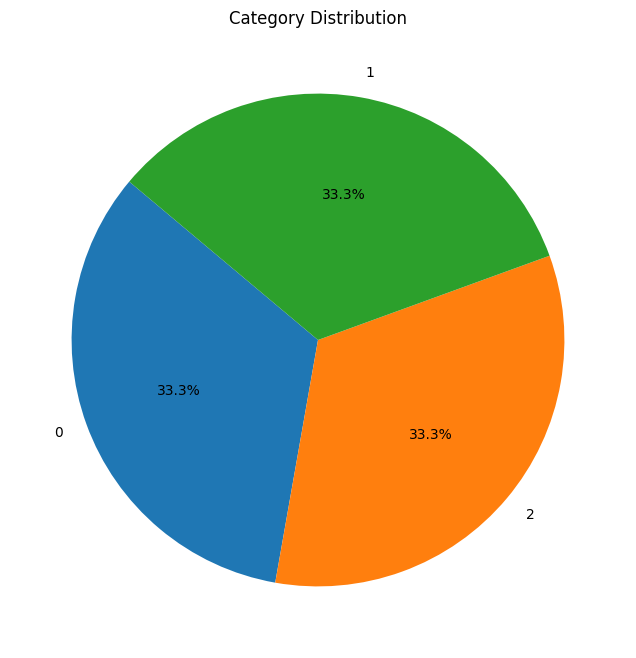

SVC - accuracy_train: 0.9989880818529345
SVC - accuracy_test: 0.9258093525179856
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1506
           1       0.88      0.91      0.89      1469
           2       0.95      0.92      0.93      1473

    accuracy                           0.93      4448
   macro avg       0.93      0.93      0.93      4448
weighted avg       0.93      0.93      0.93      4448



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import csr_matrix, vstack

svm_tfidf = TfidfVectorizer(max_features=10000)
X_tfidf = svm_tfidf.fit_transform(X)

smote = SMOTE(sampling_strategy='auto', k_neighbors=8, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)
X_resampled = pd.DataFrame(X_resampled, columns=['content'])
X_resampled.head()

plt.figure(figsize=(8, 8))
plt.pie(y_resampled.value_counts(), labels=y_resampled.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Category Distribution')
plt.show()

batch_size = 1000
X_resampled_batches = []
for i in range(0, len(X_resampled['content']), batch_size):
    batch = vstack(X_resampled['content'][i:i+batch_size])
    X_resampled_batches.append(csr_matrix(batch))

X_resampled_combined = vstack(X_resampled_batches)

X_train, X_test, y_train, y_test = train_test_split(X_resampled_combined, y_resampled, test_size=0.2, random_state=42)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(C=100, gamma='scale', kernel='rbf')

svm_model.fit(X_train, y_train)

y_pred_train_svm = svm_model.predict(X_train.toarray())
y_pred_test_svm = svm_model.predict(X_test.toarray())

accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train)
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

print('SVC - accuracy_train:', accuracy_train_svm)
print('SVC - accuracy_test:', accuracy_test_svm)

print('Classification Report:\n', classification_report(y_test, y_pred_test_svm))

Percobaan 1 - Random Forest (Algoritma) + TFIDF (Feature Extraction) + 0.01 (Pembagian Dataset)

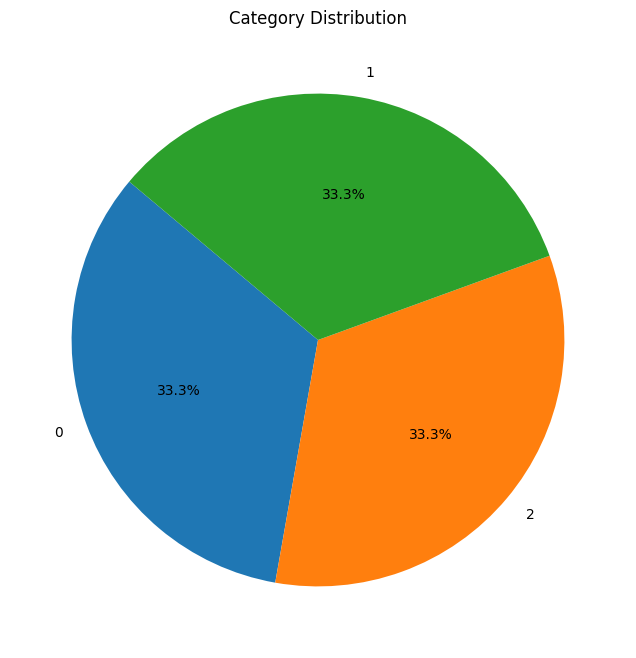

Random Forest - accuracy_train: 0.9985008858401854
Random Forest - accuracy_test: 0.9327354260089686
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        79
           1       0.92      0.88      0.90        64
           2       0.94      0.97      0.96        80

    accuracy                           0.93       223
   macro avg       0.93      0.93      0.93       223
weighted avg       0.93      0.93      0.93       223



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import csr_matrix, vstack

rf_tfidf = TfidfVectorizer(max_features=10000)

X_tfidf = rf_tfidf.fit_transform(X)

smote = SMOTE(sampling_strategy='auto', k_neighbors=8, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

X_resampled = pd.DataFrame(X_resampled, columns=['content'])
X_resampled.head()

plt.figure(figsize=(8, 8))
plt.pie(y_resampled.value_counts(), labels=y_resampled.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Category Distribution')
plt.show()

batch_size = 1000
X_resampled_batches = []
for i in range(0, len(X_resampled['content']), batch_size):
    batch = vstack(X_resampled['content'][i:i+batch_size])
    X_resampled_batches.append(csr_matrix(batch))

X_resampled_combined = vstack(X_resampled_batches)

X_train, X_test, y_train, y_test = train_test_split(X_resampled_combined, y_resampled, test_size=0.01, random_state=101)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=11)

rf_model.fit(X_train.toarray(), y_train)

y_pred_train_rf = rf_model.predict(X_train.toarray())
y_pred_test_rf = rf_model.predict(X_test.toarray())

accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

print('Classification Report:\n', classification_report(y_test, y_pred_test_rf))

Percobaan 3 - Gradient Boosting (Algoritma) + TFIDF (Feature Extraction) + 0.4 (Pembagian Dataset)

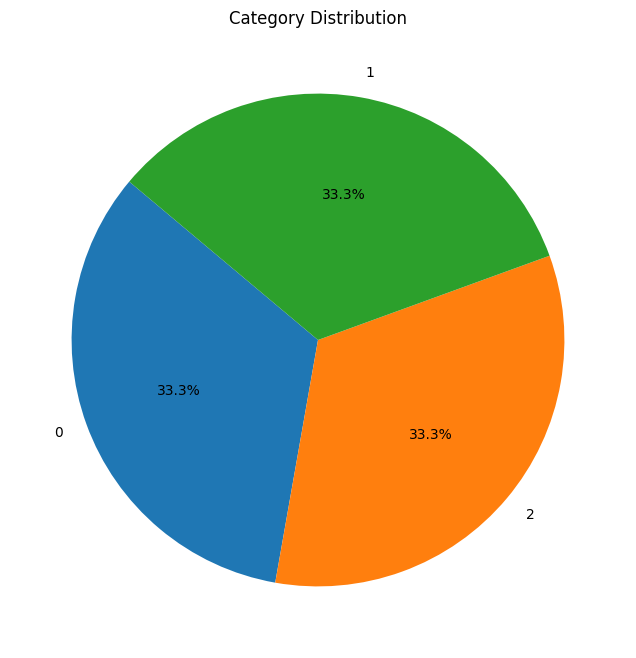

GBM - accuracy_train: 0.9908647990255786
GBM - accuracy_test: 0.9213483146067416
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       293
           1       0.89      0.89      0.89       293
           2       0.93      0.95      0.94       304

    accuracy                           0.92       890
   macro avg       0.92      0.92      0.92       890
weighted avg       0.92      0.92      0.92       890



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import csr_matrix, vstack

gb_tfidf = TfidfVectorizer(max_features=10000)
X_tfidf = gb_tfidf.fit_transform(X)

smote = SMOTE(sampling_strategy='auto', k_neighbors=8, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

X_resampled = pd.DataFrame(X_resampled, columns=['content'])

X_resampled.head()

plt.figure(figsize=(8, 8))
plt.pie(y_resampled.value_counts(), labels=y_resampled.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Category Distribution')
plt.show()

batch_size = 1000
X_resampled_batches = []
for i in range(0, len(X_resampled['content']), batch_size):
    batch = vstack(X_resampled['content'][i:i+batch_size])
    X_resampled_batches.append(csr_matrix(batch))

X_resampled_combined = vstack(X_resampled_batches)

X_train, X_test, y_train, y_test = train_test_split(X_resampled_combined, y_resampled, test_size=0.04, random_state=101)

from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=50,
    min_samples_split=25,
    min_samples_leaf=15,
    random_state=11
)

gbm_model.fit(X_train, y_train)

y_pred_train_gbm = gbm_model.predict(X_train)
y_pred_test_gbm = gbm_model.predict(X_test)

accuracy_train_gbm = accuracy_score(y_train, y_pred_train_gbm)
accuracy_test_gbm = accuracy_score(y_test, y_pred_test_gbm)

print('GBM - accuracy_train:', accuracy_train_gbm)
print('GBM - accuracy_test:', accuracy_test_gbm)

print('Classification Report:\n', classification_report(y_test, y_pred_test_gbm))

Percobaan 4 - LSTM (Algoritma) + Tokenizer (Feature Extraction) + 0.1 (Pembagian Dataset)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_for_token = X.copy()
y_for_token = y.copy()

lstm_tokenizer = Tokenizer(num_words=5000)
lstm_tokenizer.fit_on_texts(X_for_token)

sequences = lstm_tokenizer.texts_to_sequences(X_for_token)

X_for_token = pad_sequences(sequences)

y_for_token = y_for_token.values

smote = SMOTE(sampling_strategy='auto', k_neighbors=4, random_state=11)
X_resampled, y_resampled = smote.fit_resample(X_for_token, y_for_token)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, stratify=y_resampled, random_state=101)

lstm_model = Sequential([
    tf.keras.layers.Embedding(input_dim = len(lstm_tokenizer.index_word), output_dim=64),
    tf.keras.layers.LSTM(256, return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax',)
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = lstm_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=2)

Epoch 1/10
626/626 - 11s - 17ms/step - accuracy: 0.6214 - loss: 0.7774 - val_accuracy: 0.7455 - val_loss: 0.6137
Epoch 2/10
626/626 - 8s - 12ms/step - accuracy: 0.7814 - loss: 0.5430 - val_accuracy: 0.7891 - val_loss: 0.5203
Epoch 3/10
626/626 - 10s - 16ms/step - accuracy: 0.8277 - loss: 0.4392 - val_accuracy: 0.7914 - val_loss: 0.5332
Epoch 4/10
626/626 - 7s - 11ms/step - accuracy: 0.8565 - loss: 0.3743 - val_accuracy: 0.7837 - val_loss: 0.5676
Epoch 5/10
626/626 - 8s - 12ms/step - accuracy: 0.8730 - loss: 0.3380 - val_accuracy: 0.7765 - val_loss: 0.5885
Epoch 6/10
626/626 - 7s - 11ms/step - accuracy: 0.8846 - loss: 0.3033 - val_accuracy: 0.7810 - val_loss: 0.5948
Epoch 7/10
626/626 - 10s - 16ms/step - accuracy: 0.8970 - loss: 0.2705 - val_accuracy: 0.7743 - val_loss: 0.6206
Epoch 8/10
626/626 - 10s - 16ms/step - accuracy: 0.9069 - loss: 0.2454 - val_accuracy: 0.7815 - val_loss: 0.6613
Epoch 9/10
626/626 - 11s - 17ms/step - accuracy: 0.9168 - loss: 0.2199 - val_accuracy: 0.7698 - val_

In [24]:
import joblib

joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(gbm_model, 'gbm_model.pkl')
lstm_model.save('lstm_model.h5')

In [26]:
import joblib
import json

joblib.dump(svm_tfidf, 'svm_tfidf.pkl')
joblib.dump(rf_tfidf, 'rf_tfidf.pkl')
joblib.dump(gb_tfidf, 'gb_tfidf.pkl')
tokenizer_json = lstm_tokenizer.to_json()
with open('lstm_tokenizer.json', 'w') as f:
    json.dump(tokenizer_json, f)

In [28]:
%pip freeze > requirements.txt